In [1]:
import pandas as pd
import re 
import numpy as np
import ast
import math
from sklearn import metrics 
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Structured vs Text models - Main Figure and Table

In [2]:
dftext=pd.read_csv("../../../predictglaucomasurgery/predictionsfromBen/textmodel/AGS - textcnn-preds.csv", header=None)
dfstruct=pd.read_csv("../../../predictglaucomasurgery/predictionsfromBen/structuredmodel/AGS - structuredpreds.csv", header=None)
dfcombo=pd.read_csv("../../../predictglaucomasurgery/predictionsfromBen/combomodel/AGS - combo-11-preds.csv", header=None)


In [3]:
len(dftext)

500

In [4]:
dfrating=pd.read_excel("../../../predictglaucomasurgery/RateHeldoutSet.xlsx", header=None, names=["prediction"])
dfkey=pd.read_csv("../../../predictglaucomasurgery/originalholdoutsetkey.csv", header=None, names=["patid", "label", "note"])

In [5]:
len(dfrating)

300

In [6]:
dfoph=pd.concat([dfkey['label'],dfrating["prediction"]], axis=1)

In [7]:
def preprocessdf(df): 
    df.columns=["predictions", "label"]
    proba=df["predictions"].tolist()
    y=df["label"].tolist() 
    return y, proba

In [8]:
def returnauc(df):
    fpr, tpr, thresholds = metrics.roc_curve(*preprocessdf(df), pos_label=1)
    auc=metrics.auc(fpr, tpr)
    return auc

In [9]:
returnauc(dftext)
returnauc(dfstruct)
returnauc(dfcombo)

0.6972298534798534

0.6576522435897436

0.731198489010989

In [10]:
def returnfprtpr(df):
    fpr, tpr, thresholds = metrics.roc_curve(*preprocessdf(df), pos_label=1)
    return fpr, tpr

In [11]:
from sklearn import metrics 
fpr, tpr, thresholds = metrics.roc_curve(*preprocessdf(dftext), pos_label=1)
auc=metrics.auc(fpr, tpr)
auc


0.6972298534798534

In [12]:
def returnauprc(df):
    precision, recall, thresholds=metrics.precision_recall_curve(*preprocessdf(df), pos_label=1)
    return metrics.auc(recall, precision)
returnauprc(dftext)

0.4308693942234415

In [13]:
def returnrecallprecision(df): 
    precision, recall, thresholds=metrics.precision_recall_curve(*preprocessdf(df), pos_label=1)
    return recall, precision

<Figure size 1008x360 with 0 Axes>

<AxesSubplot:>

(<matplotlib.collections.PathCollection at 0x2285db50438>,)

(0.0, 1.0)

(0.0, 1.05)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Curve')

<AxesSubplot:>

(<matplotlib.collections.PathCollection at 0x2285dbb3748>,)

(0.0, 1.0)

(0.0, 1.05)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision Recall Curve')

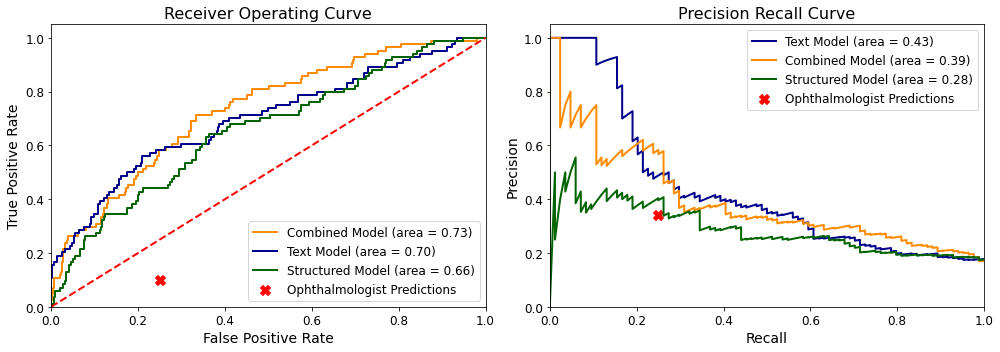

In [41]:
#combine into one figure 
lw = 2
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(*returnfprtpr(dfcombo), color='darkorange',
         lw=lw, label='Combined Model (area = %0.2f)' % returnauc(dfcombo))
plt.plot(*returnfprtpr(dftext), color='darkblue',
         lw=lw, label='Text Model (area = %0.2f)' % returnauc(dftext))
plt.plot(*returnfprtpr(dfstruct), color='darkgreen',
         lw=lw, label='Structured Model (area = %0.2f)' % returnauc(dfstruct))
plt.scatter(0.25, 1-0.90, 
            color="red", marker="X", s=100, label = 'Ophthalmologist Predictions'),
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Curve', fontsize=16)
plt.legend(loc="lower right", prop={'size': 12})

plt.subplot(1, 2, 2)
plt.plot(*returnrecallprecision(dftext), color='darkblue', lw=lw, label='Text Model (area = %0.2f)' % returnauprc(dftext))
plt.plot(*returnrecallprecision(dfcombo), color='darkorange', lw=lw, label='Combined Model (area = %0.2f)' % returnauprc(dfcombo))
plt.plot(*returnrecallprecision(dfstruct), color='darkgreen', lw=lw, label='Structured Model (area = %0.2f)' % returnauprc(dfstruct))
plt.scatter(0.25, 0.34, 
            color="red", marker="X", s=100, label = 'Ophthalmologist Predictions'),
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision Recall Curve', fontsize=16)
plt.legend(loc="upper right", prop={'size': 12})

plt.tight_layout()
plt.savefig('fig3.jpg', dpi=600)
plt.show()


In [16]:
def getpredictions(df,threshold=0.5): 
    Y , proba = preprocessdf(df)
    predictions=np.where(np.array(proba)>threshold, 1,0)
    return Y, list(predictions)

In [17]:
#get overall percent positive predictions
np.mean(getpredictions(dfstruct, threshold=0.15)[1])
np.mean(getpredictions(dftext, threshold=0.20)[1])
np.mean(getpredictions(dfcombo, threshold=0.15)[1])

0.508

0.284

0.49

In [18]:
print(metrics.classification_report(*getpredictions(dfstruct, threshold=0.15)))
print(metrics.classification_report(*getpredictions(dftext, threshold=0.20)))
print(metrics.classification_report(*getpredictions(dfcombo, threshold=0.15)))

              precision    recall  f1-score   support

           0       0.89      0.53      0.66       416
           1       0.23      0.69      0.34        84

    accuracy                           0.56       500
   macro avg       0.56      0.61      0.50       500
weighted avg       0.78      0.56      0.61       500

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       416
           1       0.33      0.56      0.42        84

    accuracy                           0.74       500
   macro avg       0.61      0.67      0.62       500
weighted avg       0.80      0.74      0.76       500

              precision    recall  f1-score   support

           0       0.93      0.57      0.70       416
           1       0.27      0.77      0.40        84

    accuracy                           0.60       500
   macro avg       0.60      0.67      0.55       500
weighted avg       0.81      0.60      0.65       500



In [19]:
print(metrics.classification_report(*getpredictions(dftext)))
print(metrics.classification_report(*getpredictions(dfstruct)))
print(metrics.classification_report(*getpredictions(dfcombo)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       416
           1       0.81      0.15      0.26        84

    accuracy                           0.85       500
   macro avg       0.83      0.57      0.59       500
weighted avg       0.85      0.85      0.81       500

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       416
           1       0.00      0.00      0.00        84

    accuracy                           0.83       500
   macro avg       0.42      0.50      0.45       500
weighted avg       0.69      0.83      0.76       500

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       416
           1       0.70      0.08      0.15        84

    accuracy                           0.84       500
   macro avg       0.77      0.54      0.53       500
weighted avg       0.82      0.84      0.78       500



C:\Users\Sophia\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#percent positive predictions by ophthalmologist
dfoph["prediction"].mean()

0.12666666666666668

In [21]:
print(metrics.classification_report(dfoph["label"], dfoph["prediction"]))


              precision    recall  f1-score   support

           0       0.85      0.90      0.88       249
           1       0.34      0.25      0.29        51

    accuracy                           0.79       300
   macro avg       0.60      0.58      0.58       300
weighted avg       0.77      0.79      0.78       300



# Supplemental Figure and Tables - basic ML Models 

In [25]:
dfml=pd.read_csv("../../../predictglaucomasurgery/predictionsfromBen/structuredmodel/bestmlmodels_glaucoma_structured_results.csv")
dfml.head()

,Y-Holdout,L1,L2,ElasticNet,Gradient Boosted Forest
0,0,0.206054,0.132968,0.151553,0.203830
1,0,0.127346,0.119415,0.115465,0.155419
2,0,0.113129,0.089817,0.111170,0.140821
3,0,0.140474,0.167591,0.147183,0.153160
4,0,0.143584,0.061938,0.099946,0.151555


In [43]:
len(dfml)

500

In [26]:
dfstruct.head()

,predictions,label
0,0.121847,0
1,0.132427,0
2,0.124185,0
3,0.183501,0
4,0.098835,0


In [33]:
dfl1=dfml[["L1","Y-Holdout"]]
dfl1.columns=["predictions","label"]
dfl1.head()

dfl2=dfml[["L2","Y-Holdout"]]
dfl2.columns=["predictions","label"]
dfl2.head()

dfen=dfml[["ElasticNet","Y-Holdout"]]
dfen.columns=["predictions","label"]
dfen.head()

dfgbt=dfml[["Gradient Boosted Forest","Y-Holdout"]]
dfgbt.columns=["predictions","label"]
dfgbt.head()

,predictions,label
0,0.206054,0
1,0.127346,0
2,0.113129,0
3,0.140474,0
4,0.143584,0


,predictions,label
0,0.132968,0
1,0.119415,0
2,0.089817,0
3,0.167591,0
4,0.061938,0


,predictions,label
0,0.151553,0
1,0.115465,0
2,0.111170,0
3,0.147183,0
4,0.099946,0


,predictions,label
0,0.203830,0
1,0.155419,0
2,0.140821,0
3,0.153160,0
4,0.151555,0


<Figure size 1008x360 with 0 Axes>

<AxesSubplot:>

(0.0, 1.0)

(0.0, 1.05)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Curve')

<AxesSubplot:>

(0.0, 1.0)

(0.0, 1.05)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision Recall Curve')

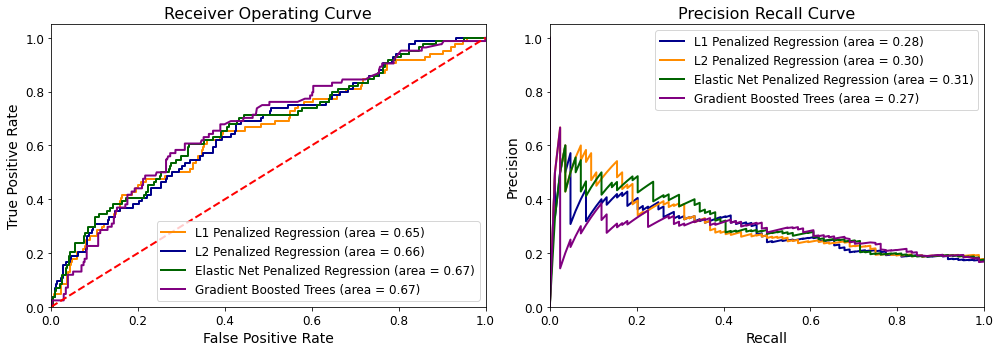

In [45]:
#combine into one figure 
lw = 2
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(*returnfprtpr(dfl1), color='darkorange',
         lw=lw, label='L1 Penalized Regression (area = %0.2f)' % returnauc(dfl1))
plt.plot(*returnfprtpr(dfl2), color='darkblue',
         lw=lw, label='L2 Penalized Regression (area = %0.2f)' % returnauc(dfl2))
plt.plot(*returnfprtpr(dfen), color='darkgreen',
         lw=lw, label='Elastic Net Penalized Regression (area = %0.2f)' % returnauc(dfen))
plt.plot(*returnfprtpr(dfgbt), color='purple',
         lw=lw, label='Gradient Boosted Trees (area = %0.2f)' % returnauc(dfgbt))
#plt.scatter(0.25, 1-0.90, color="red", marker="X", s=100, label = 'Ophthalmologist Predictions'),
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Curve', fontsize=16)
plt.legend(loc="lower right", prop={'size': 12})

plt.subplot(1, 2, 2)
plt.plot(*returnrecallprecision(dfl1), color='darkblue', lw=lw, label='L1 Penalized Regression (area = %0.2f)' % returnauprc(dfl1))
plt.plot(*returnrecallprecision(dfl2), color='darkorange', lw=lw, label='L2 Penalized Regression (area = %0.2f)' % returnauprc(dfl2))
plt.plot(*returnrecallprecision(dfen), color='darkgreen', lw=lw, label='Elastic Net Penalized Regression (area = %0.2f)' % returnauprc(dfen))
plt.plot(*returnrecallprecision(dfgbt), color='purple', lw=lw, label='Gradient Boosted Trees (area = %0.2f)' % returnauprc(dfgbt))

#plt.scatter(0.25, 0.34, color="red", marker="X", s=100, label = 'Ophthalmologist Performance'),

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision Recall Curve', fontsize=16)
plt.legend(loc="upper right", prop={'size': 12})

plt.tight_layout()
plt.savefig('FigSupplement.jpg', dpi=600)
plt.show()

In [46]:

#get overall percent positive predictions
np.mean(getpredictions(dfl1, threshold=0.20)[1])
np.mean(getpredictions(dfl2, threshold=0.15)[1])
np.mean(getpredictions(dfen, threshold=0.30)[1])
np.mean(getpredictions(dfgbt, threshold=0.15)[1])

0.208

0.464

0.06

0.634

In [47]:
print(metrics.classification_report(*getpredictions(dfl1, threshold=0.20)))
print(metrics.classification_report(*getpredictions(dfl2, threshold=0.15)))
print(metrics.classification_report(*getpredictions(dfen, threshold=0.30)))
print(metrics.classification_report(*getpredictions(dfgbt, threshold=0.15)))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       416
           1       0.34      0.42      0.37        84

    accuracy                           0.76       500
   macro avg       0.61      0.63      0.61       500
weighted avg       0.79      0.76      0.77       500

              precision    recall  f1-score   support

           0       0.89      0.57      0.70       416
           1       0.24      0.65      0.35        84

    accuracy                           0.59       500
   macro avg       0.56      0.61      0.52       500
weighted avg       0.78      0.59      0.64       500

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       416
           1       0.43      0.15      0.23        84

    accuracy                           0.82       500
   macro avg       0.64      0.56      0.56       500
weighted avg       0.78      0.82      0.79       500

              preci